_________
# Projeto 1

## <font color='red'>Bruno Xavier Gomes</font>
___

## <font color='blue'>Projeto 1 de C.D.</font>

______
## Introdução

###### Reportagens

Água: http://memoria.ebc.com.br/agenciabrasil/noticia/2013-03-22/mais-da-metade-da-populacao-mundial-ainda-nao-tem-agua-de-qualidade-em-casa (2013)

Banheiro: https://noticias.uol.com.br/cotidiano/ultimas-noticias/2010/07/27/no-brasil-13-milhoes-de-pessoas-nao-possuem-banheiro-em-casa-pais-e-9-em-ranking-mundial-da-vergonha.htm  (2010)

Segundo  estudos realizados pela OMS (Organização Mundial de Saúde), pela Unicef (Fundo das Nações Unidas para a Infância) e divulgado pelo Instituto Trata Brasil, o Brasil ocupava a nona posição no ranking mundial dos países que tem menos pessoas com acesso ao banheiro no ano de 2010. Outro dado qu preocupa é o número de pessoas sem acesso a água encanadas em suas casas, como mostrado pelo Relatório Mundial das Nações Unidas sobre o Desenvolvimento dos Recursos Hídricos, divulgado pela ONU-Água.

Esse trabalho busca ver se a situação do país melhorou nesses últimos anos, especialmente do Norte e Nordeste, onde os estudos apresentavam mais problemas e procurar uma razão para caso tenha melhorado ou não.

_____
## Análise e Resultados

In [74]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import zeros_like

In [75]:
import os

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


In [76]:
dados2015 = pd.read_csv("C:\\Users\\Usuario\\Documents\\Insper\\C.D\\DP\\Projeto_1\\PNAD_DOM_2015\\DOM2015csv.zip")
dados2009 = pd.read_csv("C:\\Users\\Usuario\\Documents\\Insper\\C.D\\DP\\Projeto_1\\PNAD_DOM_2009\\DOM2009csv.zip")

In [77]:
dados2015 = dados2015.dropna(subset = ['UF', 'V0105', 'V0207', 'V0211', 'V0215', 'V4614'])
dados2009 = dados2009.dropna(subset = ['UF', 'V0105', 'V0207', 'V0211', 'V0215', 'V4614'])

In [78]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

_______
#### Separação das Variáveis

In [79]:
dados2015.V0207 = dados2015.V0207.astype('category')
dados2015.V0207.cat.categories = ('Próprio - Já pago', 'Próprio - Ainda pagando', 'Alugado', 'Cedido por empregador', 
                                 'Cedido de outra forma', 'Outra condição')

dados2015.V0211 = dados2015.V0211.astype('category')
dados2015.V0211.cat.categories = ('Sim', 'Não')

dados2015.V0215 = dados2015.V0215.astype('category')
dados2015.V0215.cat.categories = ('Sim', 'Não')

In [80]:
df1["REGIAO"] = 'x'              
df1['UF'] = dados2015.UF                  # Unidade da Federação (Estados)
df1["Moradores"] = dados2015.V0105        # Total de moradores
df1["Condicao"] = dados2015.V0207         # Condição de ocupação do domicílio
df1["AguaCanalizada"] = dados2015.V0211   # Tem água canalizada em pelo menos um cômodo do domicílio
df1["Banheiro"] = dados2015.V0215         # Tem banheiro ou sanitário no dimicílio ou na propriedade
df1["RENDA"] = dados2015.V4614
df1 = df1[df1.RENDA < 500000]             # Rendimento mensal dimiciliar para todas unidades domiciliares

In [81]:
dados2009.V0207 = dados2009.V0207.astype('category')
dados2009.V0207.cat.categories = ('Próprio - Já pago', 'Próprio - Ainda pagando', 'Alugado', 'Cedido por empregador', 
                                 'Cedido de outra forma', 'Outra condição')

dados2009.V0211 = dados2009.V0211.astype('category')
dados2009.V0211.cat.categories = ('Sim', 'Não')

dados2009.V0215 = dados2009.V0215.astype('category')
dados2009.V0215.cat.categories = ('Sim', 'Não')

In [82]:
df2["REGIAO"] = 'x'              
df2['UF'] = dados2009.UF                  # Unidade da Federação (Estados)
df2["Moradores"] = dados2009.V0105        # Total de moradores
df2["Condicao"] = dados2009.V0207         # Condição de ocupação do domicílio
df2["AguaCanalizada"] = dados2009.V0211   # Tem água canalizada em pelo menos um cômodo do domicílio
df2["Banheiro"] = dados2009.V0215         # Tem banheiro ou sanitário no dimicílio ou na propriedade
df2["RENDA"] = dados2009.V4614
df2 = df2[df2.RENDA < 500000]             # Rendimento mensal dimiciliar para todas unidades domiciliares

______
#### Separação dos Estados em Regiões

In [83]:
df1.loc[(df1['UF'] >= 10) & (df1['UF'] < 20), 'REGIAO'] = 'Norte'
df1.loc[(df1['UF'] >= 20) & (df1['UF'] < 30), 'REGIAO'] = 'Nordeste'
df1.loc[(df1['UF'] >= 30) & (df1['UF'] < 40), 'REGIAO'] = 'Sudeste'
df1.loc[(df1['UF'] >= 40) & (df1['UF'] < 50), 'REGIAO'] = 'Sul'
df1.loc[(df1['UF'] >= 50) & (df1['UF'] < 60), 'REGIAO'] = 'Centro-Oeste'

In [84]:
df2.loc[(df2['UF'] >= 10) & (df2['UF'] < 20), 'REGIAO'] = 'Norte'
df2.loc[(df2['UF'] >= 20) & (df2['UF'] < 30), 'REGIAO'] = 'Nordeste'
df2.loc[(df2['UF'] >= 30) & (df2['UF'] < 40), 'REGIAO'] = 'Sudeste'
df2.loc[(df2['UF'] >= 40) & (df2['UF'] < 50), 'REGIAO'] = 'Sul'
df2.loc[(df2['UF'] >= 50) & (df2['UF'] < 60), 'REGIAO'] = 'Centro-Oeste'

__________
#### Gráficos de Barra e de Pizza

In [110]:
ct1 = pd.crosstab(df2.Condicao, df2.REGIAO)
ct1 = (ct1/ct1.sum().sum()*100).round(decimals = 0)

ct2 = pd.crosstab(df1.Condicao, df1.REGIAO)
ct2 = (ct2/ct2.sum().sum()*100).round(decimals = 0)

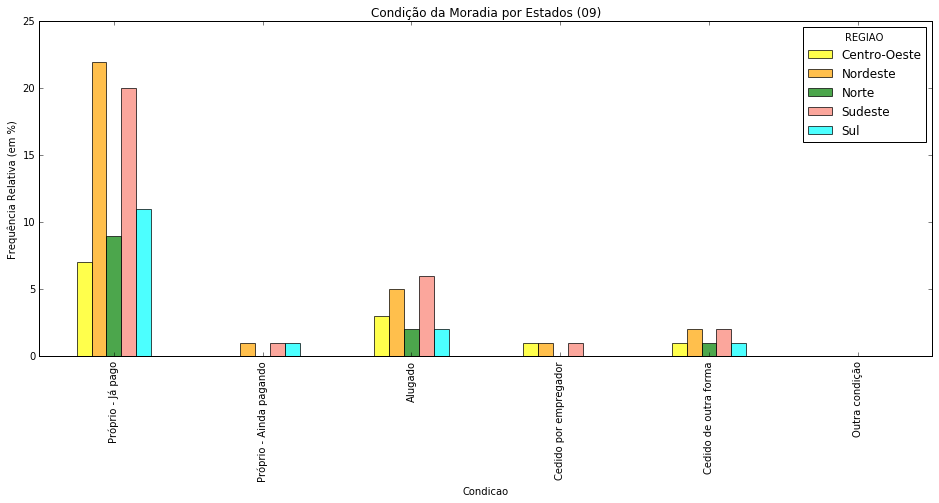

In [114]:
ct1.plot.bar(color = ('yellow', 'orange', 'green', 'salmon', 'cyan'), alpha = 0.7, figsize = (16, 6))
plt.title('Condição da Moradia por Estados (09)')
plt.ylabel('Frequência Relativa (em %)')

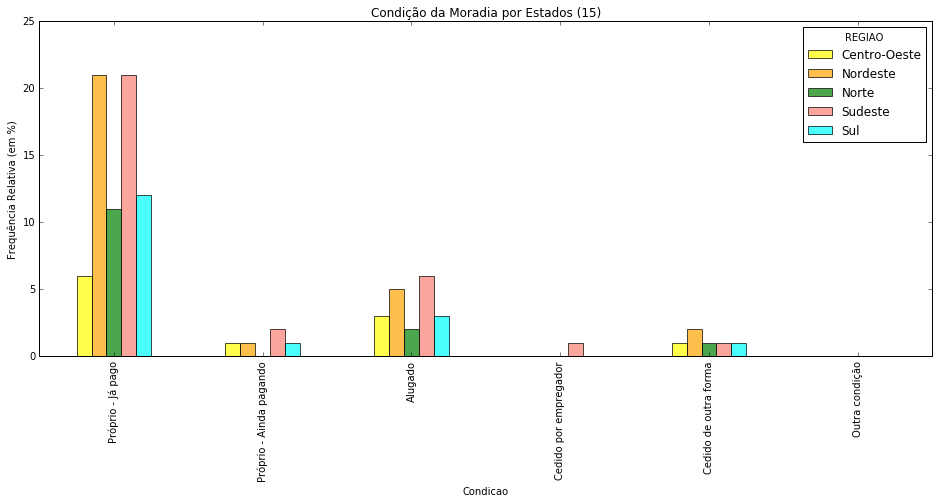

In [115]:
ct2.plot.bar(color = ('yellow', 'orange', 'green', 'salmon', 'cyan'), alpha = 0.7, figsize = (16, 6))
plt.title('Condição da Moradia por Estados (15)')
plt.ylabel('Frequência Relativa (em %)')

Pode-se perceber pelos gráficos feitos que não houve muita mudança quanto a condição da moradia das pessoas durante esses seis anos, apenas há uma pequena diminuição nos apartamentos próprios já pagos no Nordeste e um aumento no próprio ainda pagando no Centro-Oeste e Sudeste.
_______

 
 
V0211 - Tem água canalizada em casa?
 
2015


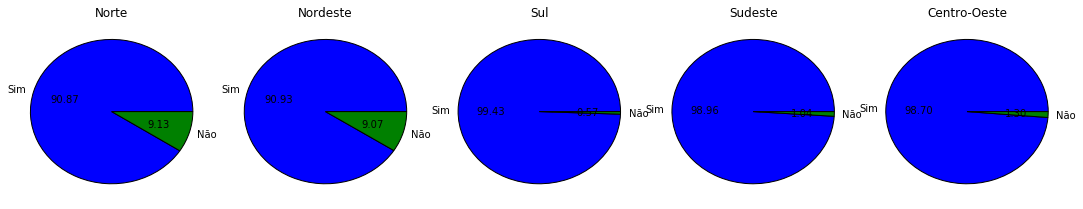

2009


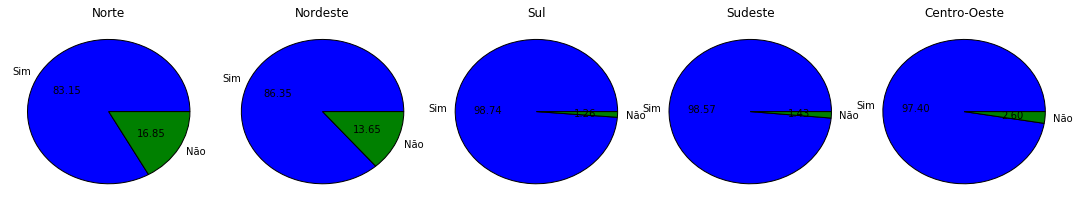

 
 
V0215 - Tem pelo menos um banheiro em casa
 
2015


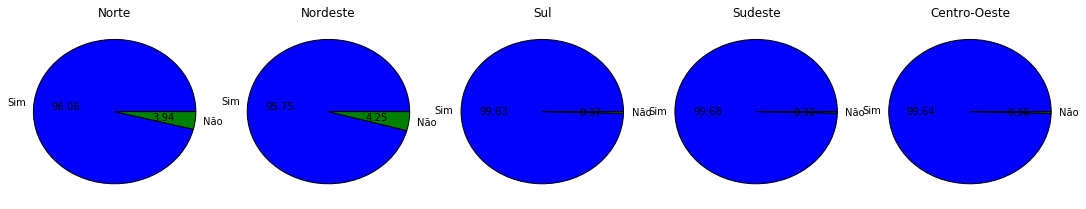

2009


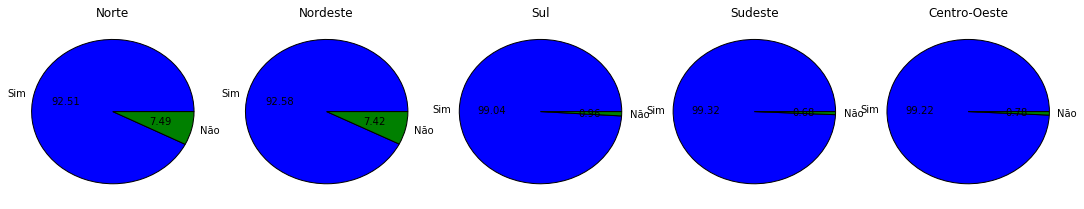

In [61]:
vars = ('AguaCanalizada', 'Banheiro')
nomevar = (
         'V0211 - Tem água canalizada em casa?',
         'V0215 - Tem pelo menos um banheiro em casa')

for var in vars:
    print(' ')    
    print(' ')
    print(nomevar[vars.index(var)])
    print(' ')
    print('2015')
    
    fig = plt.figure(figsize = (15, 3))

    plt.subplot(151)
    a = df1[var][df1.REGIAO == 'Norte'].value_counts().reindex(['Sim', 'Não'])
    a.plot(kind = 'pie', autopct = "%.2f", legend = False)
    plt.title('Norte')
    plt.ylabel(' ')

    plt.subplot(152)
    a = df1[var][df1.REGIAO == 'Nordeste'].value_counts().reindex(['Sim', 'Não'])
    a.plot(kind = 'pie', autopct = "%.2f", legend = False)
    plt.title('Nordeste')
    plt.ylabel(' ')

    plt.subplot(153)
    a = df1[var][df1.REGIAO == 'Sul'].value_counts().reindex(['Sim', 'Não'])
    a.plot(kind = 'pie', autopct = "%.2f", legend = False)
    plt.title('Sul')
    plt.ylabel(' ')

    plt.subplot(154)
    a = df1[var][df1.REGIAO == 'Sudeste'].value_counts().reindex(['Sim', 'Não'])
    a.plot(kind = 'pie', autopct = "%.2f",legend = False)
    plt.title('Sudeste')
    plt.ylabel(' ')

    plt.subplot(155)
    a = df1[var][df1.REGIAO == 'Centro-Oeste'].value_counts().reindex(['Sim', 'Não'])
    a.plot(kind = 'pie', autopct = "%.2f", legend = False)
    plt.title('Centro-Oeste')
    plt.ylabel(' ')

    plt.tight_layout()
    plt.show()
    
    print('2009')
    
    fig = plt.figure(figsize=(15, 3))

    plt.subplot(151)
    a = df2[var][df2.REGIAO == 'Norte'].value_counts().reindex(['Sim','Não'])
    a.plot(kind='pie', autopct="%.2f",legend=False)
    plt.title('Norte')
    plt.ylabel(' ')

    plt.subplot(152)
    a = df2[var][df2.REGIAO == 'Nordeste'].value_counts().reindex(['Sim','Não'])
    a.plot(kind='pie', autopct="%.2f",legend=False)
    plt.title('Nordeste')
    plt.ylabel(' ')

    plt.subplot(153)
    a = df2[var][df2.REGIAO == 'Sul'].value_counts().reindex(['Sim','Não'])
    a.plot(kind='pie', autopct="%.2f",legend=False)
    plt.title('Sul')
    plt.ylabel(' ')

    plt.subplot(154)
    a = df2[var][df2.REGIAO == 'Sudeste'].value_counts().reindex(['Sim','Não'])
    a.plot(kind='pie', autopct="%.2f",legend=False)
    plt.title('Sudeste')
    plt.ylabel(' ')

    plt.subplot(155)
    a = df2[var][df2.REGIAO == 'Centro-Oeste'].value_counts().reindex(['Sim','Não'])
    a.plot(kind='pie', autopct="%.2f",legend=False)
    plt.title('Centro-Oeste')
    plt.ylabel(' ')

    plt.tight_layout()
    plt.show()

Ao olhar os gráficos acima, percebe-se rápidamente que as números do Sul, Seudeste e Centro-Oeste estão muito melhores do que o do Norte e Nordeste, que, mesmo estando melhores em 2015 do que em 2009, mostra uma falta de investimento nessas regiões, pois ter pelo menos um sanitário e água encanada em casa são condições básicas atualmente.

__________
#### Boxplot

<function matplotlib.pyplot.show>

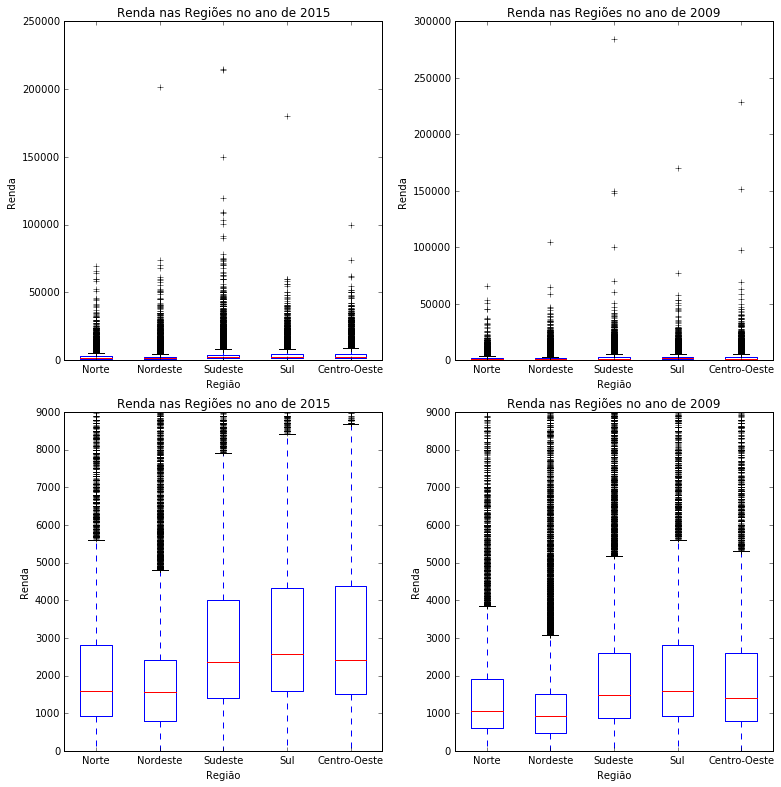

In [16]:
fig = plt.figure(figsize = (11, 11))

plt.subplot(221)
plt.boxplot((df1.RENDA[df1.REGIAO == 'Norte'], df1.RENDA[df1.REGIAO == 'Nordeste'], df1.RENDA[df1.REGIAO == 'Sudeste'],
            df1.RENDA[df1.REGIAO == 'Sul'], df1.RENDA[df1.REGIAO == 'Centro-Oeste']))
plt.title('Renda nas Regiões no ano de 2015')
plt.xlabel('Região')
plt.xticks([1, 2, 3, 4, 5], ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
plt.ylabel('Renda')

plt.subplot(222)
plt.boxplot((df2.RENDA[df2.REGIAO == 'Norte'], df2.RENDA[df2.REGIAO == 'Nordeste'], df2.RENDA[df2.REGIAO == 'Sudeste'],
            df2.RENDA[df2.REGIAO == 'Sul'], df2.RENDA[df2.REGIAO == 'Centro-Oeste']))
plt.title('Renda nas Regiões no ano de 2009')
plt.xlabel('Região')
plt.xticks([1, 2, 3, 4, 5], ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
plt.ylabel('Renda')

plt.subplot(223)
plt.boxplot((df1.RENDA[df1.REGIAO == 'Norte'], df1.RENDA[df1.REGIAO == 'Nordeste'], df1.RENDA[df1.REGIAO == 'Sudeste'],
            df1.RENDA[df1.REGIAO == 'Sul'], df1.RENDA[df1.REGIAO == 'Centro-Oeste']))
plt.title('Renda nas Regiões no ano de 2015')
plt.xlabel('Região')
plt.xticks([1, 2, 3, 4, 5], ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
plt.ylabel('Renda')
plt.ylim((0,9000))

plt.subplot(224)
plt.boxplot((df2.RENDA[df2.REGIAO == 'Norte'], df2.RENDA[df2.REGIAO == 'Nordeste'], df2.RENDA[df2.REGIAO == 'Sudeste'],
            df2.RENDA[df2.REGIAO == 'Sul'], df2.RENDA[df2.REGIAO == 'Centro-Oeste']))
plt.title('Renda nas Regiões no ano de 2009')
plt.xlabel('Região')
plt.xticks([1, 2, 3, 4, 5], ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
plt.ylabel('Renda')
plt.ylim((0,9000))

plt.tight_layout()
plt.show

Ao montar o boxplot com as rendas de cada região do país nos anos de 2009 e 2015 pode-se perceber que houve algumas mudanças, principalmente no Sudeste, Sul e Centro-Oeste, porém não se pode tirar muitas conclusões baseando-se apenas nesses gráficos, pois uma certa quantidade de dinheiro em 2009 não necessáriamente tem o mesmo valor de compra que essa mesma quantidade no ano de 2015, devido a inflação, valorização ou desvalorização do real, aumento de preços, entre outros, que fazem com que o poder de compra do consumidor mude.

Uma alternativa a esses gráfico seria mudar a renda para quantidade de salários mínimos recebidos, o que representaria melhor o poder de compra da pessoas.

<function matplotlib.pyplot.show>

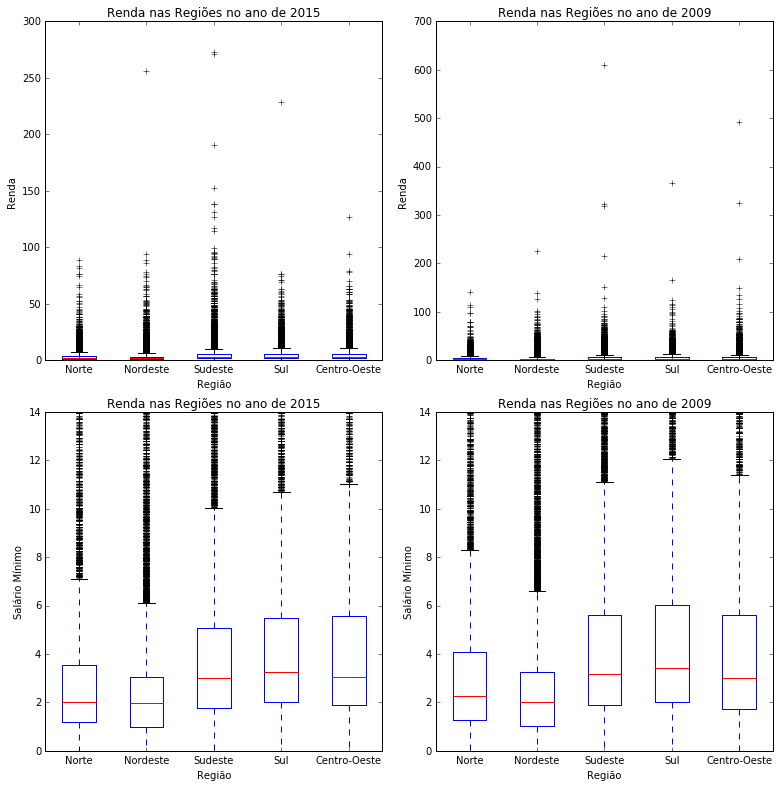

In [17]:
df1['SM'] = df1.RENDA/788
df2['SM'] = df2.RENDA/465

fig = plt.figure(figsize = (11, 11))

plt.subplot(221)
plt.boxplot((df1.SM[df1.REGIAO == 'Norte'], df1.SM[df1.REGIAO == 'Nordeste'], df1.SM[df1.REGIAO == 'Sudeste'],
            df1.SM[df1.REGIAO == 'Sul'], df1.SM[df1.REGIAO == 'Centro-Oeste']))
plt.title('Renda nas Regiões no ano de 2015')
plt.xlabel('Região')
plt.xticks([1, 2, 3, 4, 5], ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
plt.ylabel('Renda')

plt.subplot(222)
plt.boxplot((df2.SM[df2.REGIAO == 'Norte'], df2.SM[df2.REGIAO == 'Nordeste'], df2.SM[df2.REGIAO == 'Sudeste'],
            df2.SM[df2.REGIAO == 'Sul'], df2.SM[df2.REGIAO == 'Centro-Oeste']))
plt.title('Renda nas Regiões no ano de 2009')
plt.xlabel('Região')
plt.xticks([1, 2, 3, 4, 5], ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
plt.ylabel('Renda')

plt.subplot(223)
plt.boxplot((df1.SM[df1.REGIAO == 'Norte'], df1.SM[df1.REGIAO == 'Nordeste'], df1.SM[df1.REGIAO == 'Sudeste'],
            df1.SM[df1.REGIAO == 'Sul'], df1.SM[df1.REGIAO == 'Centro-Oeste']))
plt.title('Renda nas Regiões no ano de 2015')
plt.xlabel('Região')
plt.xticks([1, 2, 3, 4, 5], ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
plt.ylabel('Salário Mínimo')
plt.ylim((0, 14))

plt.subplot(224)
plt.boxplot((df2.SM[df2.REGIAO == 'Norte'], df2.SM[df2.REGIAO == 'Nordeste'], df2.SM[df2.REGIAO == 'Sudeste'],
            df2.SM[df2.REGIAO == 'Sul'], df2.SM[df2.REGIAO == 'Centro-Oeste']))
plt.title('Renda nas Regiões no ano de 2009')
plt.xlabel('Região')
plt.xticks([1, 2, 3, 4, 5], ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])
plt.ylabel('Salário Mínimo')
plt.ylim((0, 14))

plt.tight_layout()
plt.show

Agora que o boxplot foi feito com base na quantidade de salário mínimos recebidos pode-se perceber que não existe mudanças significativas na renda dos brasileiros, podendo-se perceber apenas pequenas mudanças como a acontecida no Norte e no Sul.

__________
#### Histograma

In [18]:
faixa = range(0, 25, 1)

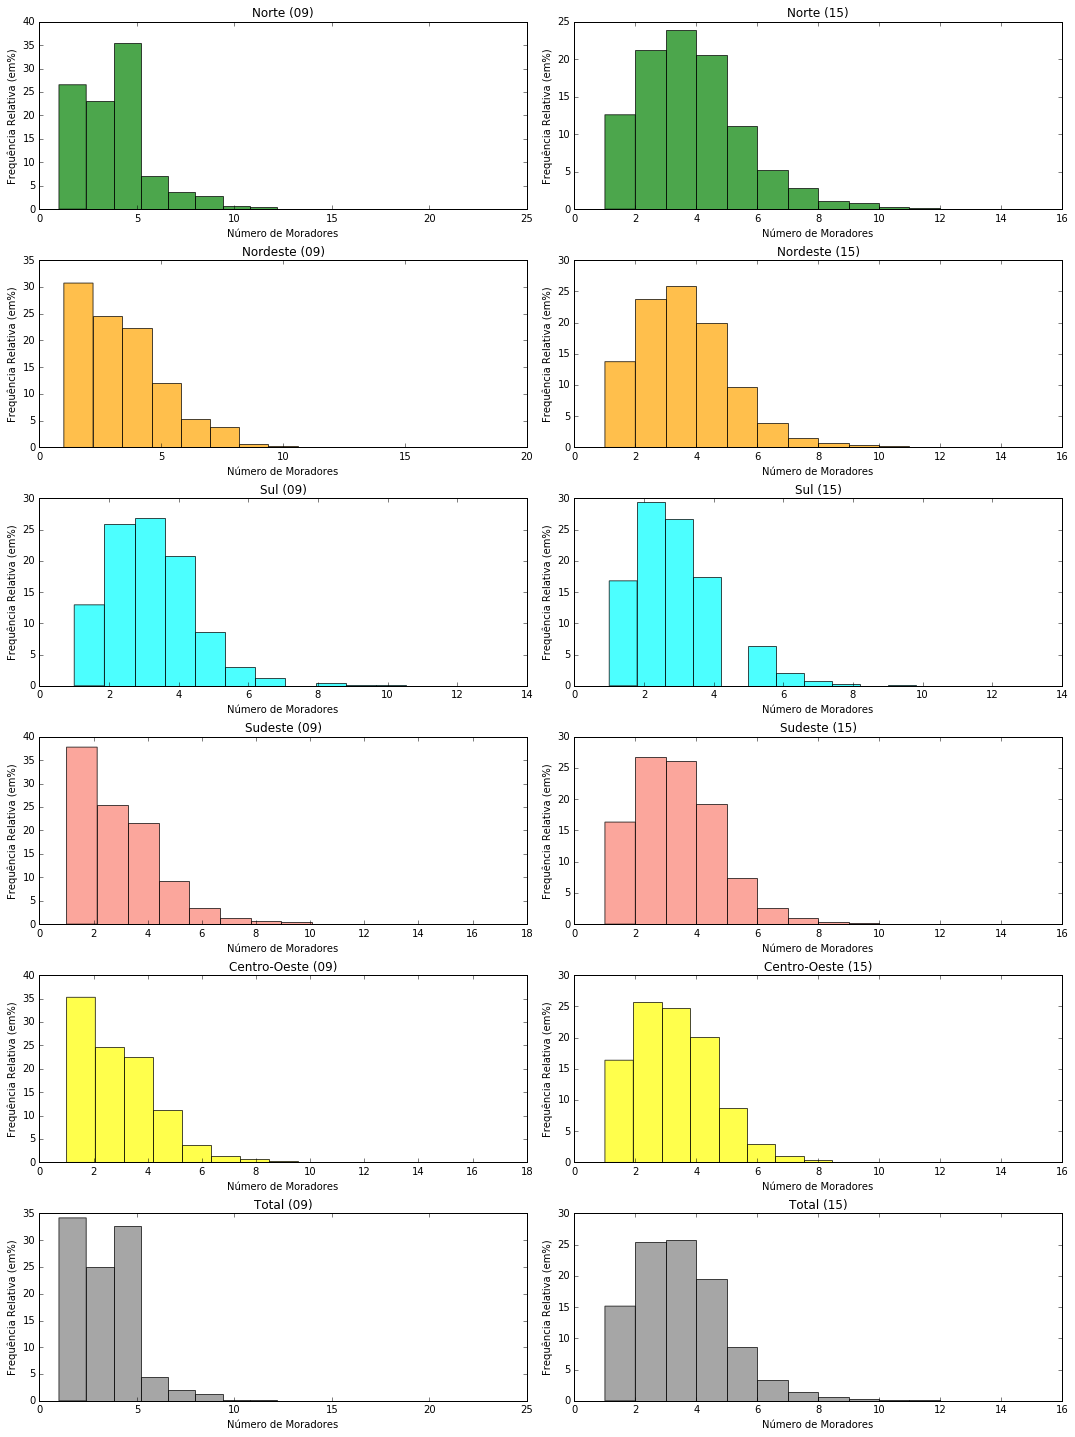

In [119]:
f, axarr = plt.subplots(6, 2, figsize = (15, 20))

#---------------------------------------------------------------------------------------------------------------------------
# Norte

axarr[0, 0].hist(df2.Moradores[df2.REGIAO == 'Norte'], bins = 15, 
              weights = zeros_like(df2.Moradores[df2.REGIAO == 'Norte']) + 1./df2.Moradores[df2.REGIAO == 'Norte'].size*100,
              alpha = 0.7, color = 'green')
axarr[0, 0].set_title('Norte (09)')
axarr[0, 0].set_xlabel('Número de Moradores')
axarr[0, 0].set_ylabel('Frequência Relativa (em%)')

axarr[0, 1].hist(df1.Moradores[df1.REGIAO == 'Norte'], bins = 15, 
              weights = zeros_like(df1.Moradores[df1.REGIAO == 'Norte']) + 1./df1.Moradores[df1.REGIAO == 'Norte'].size*100,
              alpha = 0.7, color = 'green')
axarr[0, 1].set_title('Norte (15)')
axarr[0, 1].set_xlabel('Número de Moradores')
axarr[0, 1].set_ylabel('Frequência Relativa (em%)')

#---------------------------------------------------------------------------------------------------------------------------
# Nordeste

axarr[1, 0].hist(df2.Moradores[df2.REGIAO == 'Nordeste'], bins = 15, 
              weights = zeros_like(df2.Moradores[df2.REGIAO == 'Nordeste']) + 1./df2.Moradores[df2.REGIAO=='Nordeste'].size*100,
              alpha = 0.7, color = 'orange')
axarr[1, 0].set_title('Nordeste (09)')
axarr[1, 0].set_xlabel('Número de Moradores')
axarr[1, 0].set_ylabel('Frequência Relativa (em%)')

axarr[1, 1].hist(df1.Moradores[df1.REGIAO == 'Nordeste'], bins = 15, 
              weights = zeros_like(df1.Moradores[df1.REGIAO == 'Nordeste']) + 1./df1.Moradores[df1.REGIAO=='Nordeste'].size*100,
              alpha = 0.7, color = 'orange')
axarr[1, 1].set_title('Nordeste (15)')
axarr[1, 1].set_xlabel('Número de Moradores')
axarr[1, 1].set_ylabel('Frequência Relativa (em%)')

#---------------------------------------------------------------------------------------------------------------------------
# Sul

axarr[2, 0].hist(df2.Moradores[df2.REGIAO == 'Sul'], bins = 15, 
              weights = zeros_like(df2.Moradores[df2.REGIAO == 'Sul']) + 1./df2.Moradores[df2.REGIAO == 'Sul'].size*100,
              alpha = 0.7, color = 'cyan')
axarr[2, 0].set_title('Sul (09)')
axarr[2, 0].set_xlabel('Número de Moradores')
axarr[2, 0].set_ylabel('Frequência Relativa (em%)')

axarr[2, 1].hist(df1.Moradores[df1.REGIAO == 'Sul'], bins = 15, 
              weights = zeros_like(df1.Moradores[df1.REGIAO == 'Sul']) + 1./df1.Moradores[df1.REGIAO == 'Sul'].size*100,
              alpha = 0.7, color = 'cyan')
axarr[2, 1].set_title('Sul (15)')
axarr[2, 1].set_xlabel('Número de Moradores')
axarr[2, 1].set_ylabel('Frequência Relativa (em%)')

#---------------------------------------------------------------------------------------------------------------------------
# Sudeste

axarr[3, 0].hist(df2.Moradores[df2.REGIAO == 'Sudeste'], bins = 15, 
              weights = zeros_like(df2.Moradores[df2.REGIAO == 'Sudeste']) + 1./df2.Moradores[df2.REGIAO == 'Sudeste'].size*100,
              alpha = 0.7, color = 'salmon')
axarr[3, 0].set_title('Sudeste (09)')
axarr[3, 0].set_xlabel('Número de Moradores')
axarr[3, 0].set_ylabel('Frequência Relativa (em%)')

axarr[3, 1].hist(df1.Moradores[df1.REGIAO == 'Sudeste'], bins = 15, 
              weights = zeros_like(df1.Moradores[df1.REGIAO == 'Sudeste']) + 1./df1.Moradores[df1.REGIAO == 'Sudeste'].size*100,
              alpha = 0.7, color = 'salmon')
axarr[3, 1].set_title('Sudeste (15)')
axarr[3, 1].set_xlabel('Número de Moradores')
axarr[3, 1].set_ylabel('Frequência Relativa (em%)')

#---------------------------------------------------------------------------------------------------------------------------
# Centro-Oeste

axarr[4, 0].hist(df2.Moradores[df2.REGIAO == 'Centro-Oeste'], bins = 15, 
              weights=zeros_like(df2.Moradores[df2.REGIAO=='Centro-Oeste'])+1./df2.Moradores[df2.REGIAO=='Centro-Oeste'].size*100,
              alpha = 0.7, color = 'yellow')
axarr[4, 0].set_title('Centro-Oeste (09)')
axarr[4, 0].set_xlabel('Número de Moradores')
axarr[4, 0].set_ylabel('Frequência Relativa (em%)')

axarr[4, 1].hist(df1.Moradores[df1.REGIAO == 'Centro-Oeste'], bins = 15, 
              weights=zeros_like(df1.Moradores[df1.REGIAO=='Centro-Oeste'])+1./df1.Moradores[df1.REGIAO=='Centro-Oeste'].size*100,
              alpha = 0.7, color = 'yellow')
axarr[4, 1].set_title('Centro-Oeste (15)')
axarr[4, 1].set_xlabel('Número de Moradores')
axarr[4, 1].set_ylabel('Frequência Relativa (em%)')

#---------------------------------------------------------------------------------------------------------------------------
# Total

axarr[5, 0].hist(df2.Moradores, bins = 15, 
              weights=zeros_like(df2.Moradores)+1./df2.Moradores.size*100,
              alpha = 0.7, color = 'grey')
axarr[5, 0].set_title('Total (09)')
axarr[5, 0].set_xlabel('Número de Moradores')
axarr[5, 0].set_ylabel('Frequência Relativa (em%)')

axarr[5, 1].hist(df1.Moradores, bins = 15, 
              weights=zeros_like(df1.Moradores)+1./df1.Moradores.size*100,
              alpha = 0.7, color = 'grey')
axarr[5, 1].set_title('Total (15)')
axarr[5, 1].set_xlabel('Número de Moradores')
axarr[5, 1].set_ylabel('Frequência Relativa (em%)')


plt.tight_layout(1)

In [44]:
# Medidas-resumo via comandos

#--------------------------------------------------------------
# Total

md09to = df2.Moradores.mean()
dp09to = df2.Moradores.std()
va09to = df2.Moradores.var()
no09to = len(df2.Moradores)

md15to = df1.Moradores.mean()
dp15to = df1.Moradores.std()
va15to = df1.Moradores.var()
no15to = len(df1.Moradores)

#---------------------------------------------------------------
# Norte

md09no = df2.Moradores[df2.REGIAO == 'Norte'].mean()
dp09no = df2.Moradores[df2.REGIAO == 'Norte'].std()
va09no = df2.Moradores[df2.REGIAO == 'Norte'].var()
no09no = len(df2.Moradores[df2.REGIAO == 'Norte'])

md15no = df1.Moradores[df1.REGIAO == 'Norte'].mean()
dp15no = df1.Moradores[df1.REGIAO == 'Norte'].std()
va15no = df1.Moradores[df1.REGIAO == 'Norte'].var()
no15no = len(df1.Moradores[df1.REGIAO == 'Norte'])

#---------------------------------------------------------------
# Nordeste

md09nd = df2.Moradores[df2.REGIAO == 'Nordeste'].mean()
dp09nd = df2.Moradores[df2.REGIAO == 'Nordeste'].std()
va09nd = df2.Moradores[df2.REGIAO == 'Nordeste'].var()
no09nd = len(df2.Moradores[df2.REGIAO == 'Nordeste'])

md15nd = df1.Moradores[df1.REGIAO == 'Nordeste'].mean()
dp15nd = df1.Moradores[df1.REGIAO == 'Nordeste'].std()
va15nd = df1.Moradores[df1.REGIAO == 'Nordeste'].var()
no15nd = len(df1.Moradores[df1.REGIAO == 'Nordeste'])

#---------------------------------------------------------------
# Sul

md09sl = df2.Moradores[df2.REGIAO == 'Sul'].mean()
dp09sl = df2.Moradores[df2.REGIAO == 'Sul'].std()
va09sl = df2.Moradores[df2.REGIAO == 'Sul'].var()
no09sl = len(df2.Moradores[df2.REGIAO == 'Sul'])

md15sl = df1.Moradores[df1.REGIAO == 'Sul'].mean()
dp15sl = df1.Moradores[df1.REGIAO == 'Sul'].std()
va15sl = df1.Moradores[df1.REGIAO == 'Sul'].var()
no15sl = len(df1.Moradores[df1.REGIAO == 'Sul'])

#---------------------------------------------------------------
# Sudeste

md09sd = df2.Moradores[df2.REGIAO == 'Sudeste'].mean()
dp09sd = df2.Moradores[df2.REGIAO == 'Sudeste'].std()
va09sd = df2.Moradores[df2.REGIAO == 'Sudeste'].var()
no09sd = len(df2.Moradores[df2.REGIAO == 'Sudeste'])

md15sd = df1.Moradores[df1.REGIAO == 'Sudeste'].mean()
dp15sd = df1.Moradores[df1.REGIAO == 'Sudeste'].std()
va15sd = df1.Moradores[df1.REGIAO == 'Sudeste'].var()
no15sd = len(df1.Moradores[df1.REGIAO == 'Sudeste'])

#---------------------------------------------------------------
# Sudeste

md09co = df2.Moradores[df2.REGIAO == 'Centro-Oeste'].mean()
dp09co = df2.Moradores[df2.REGIAO == 'Centro-Oeste'].std()
va09co = df2.Moradores[df2.REGIAO == 'Centro-Oeste'].var()
no09co = len(df2.Moradores[df2.REGIAO == 'Centro-Oeste'])

md15co = df1.Moradores[df1.REGIAO == 'Centro-Oeste'].mean()
dp15co = df1.Moradores[df1.REGIAO == 'Centro-Oeste'].std()
va15co = df1.Moradores[df1.REGIAO == 'Centro-Oeste'].var()
no15co = len(df1.Moradores[df1.REGIAO == 'Centro-Oeste'])

In [51]:
print('2009: \n')
print('Média:\nTotal:', md09to, '- Norte:', md09no, '- Nordeste:', md09nd, '- Sul:', md09sl, '- Sudeste:', md09sd,
      '- Centro-Oeste:', md09co, '\n')

print('Desvio Padrão:\nTotal:', dp09to, '- Norte:', dp09no, '- Nordeste:', dp09nd, '- Sul:', dp09sl, '- Sudeste:', dp09sd,
      '- Centro-Oeste:', dp09co, '\n')

print('Variância:\nTotal:', va09to, '- Norte:', va09no, '- Nordeste:', va09nd, '- Sul:', va09sl, '- Sudeste:', va09sd,
      '- Centro-Oeste:', va09co, '\n')

print('Extensão:\nTotal:', no09to, '- Norte:', no09no, '- Nordeste:', no09nd, '- Sul:', no09sl, '- Sudeste:', no09sd,
      '- Centro-Oeste:', no09co, '\n')

2009: 

Média:
Total: 3.2931816055588157 - Norte: 3.7495753114382784 - Nordeste: 3.4583891493636973 - Sul: 3.0419605998850394 - Sudeste: 3.1113447168792794 - Centro-Oeste: 3.2058712834023333 

Desvio Padrão:
Total: 1.6330767786712488 - Norte: 1.9190084509166718 - Nordeste: 1.7207748447439335 - Sul: 1.4285393183041695 - Sudeste: 1.5072714616795162 - Centro-Oeste: 1.5039329659749845 

Variância:
Total: 2.666939765035263 - Norte: 3.682593434689604 - Nordeste: 2.9610660663035087 - Sul: 2.040724583940941 - Sudeste: 2.271867259193505 - Centro-Oeste: 2.261814366146314 

Extensão:
Total: 117579 - Norte: 14128 - Nordeste: 35832 - Sul: 19137 - Sudeste: 35197 - Centro-Oeste: 13285 



In [52]:
print('2015: \n')
print('Média:\nTotal:', md15to, '- Norte:', md15no, '- Nordeste:', md15nd, '- Sul:', md15sl, '- Sudeste:', md15sd,
      '- Centro-Oeste:', md15co, '\n')

print('Desvio Padrão:\nTotal:', dp15to, '- Norte:', dp15no, '- Nordeste:', dp15nd, '- Sul:', dp15sl, '- Sudeste:', dp15sd,
      '- Centro-Oeste:', dp15co, '\n')

print('Variância:\nTotal:', va15to, '- Norte:', va15no, '- Nordeste:', va15nd, '- Sul:', va15sl, '- Sudeste:', va15sd,
      '- Centro-Oeste:', va15co, '\n')

print('Extensão:\nTotal:', no15to, '- Norte:', no15no, '- Nordeste:', no15nd, '- Sul:', no15sl, '- Sudeste:', no15sd,
      '- Centro-Oeste:', no15co, '\n')

2015: 

Média:
Total: 3.023426658340272 - Norte: 3.3923997100048333 - Nordeste: 3.140217729393468 - Sul: 2.785121361773668 - Sudeste: 2.897370364059749 - Centro-Oeste: 2.951563259355257 

Desvio Padrão:
Total: 1.5180819580629832 - Norte: 1.7811566791480695 - Nordeste: 1.562889427419971 - Sul: 1.3389309576564914 - Sudeste: 1.414907150287911 - Centro-Oeste: 1.4416428578304288 

Variância:
Total: 2.304572831396341 - Norte: 3.172519115673779 - Nordeste: 2.4426233623411244 - Sul: 1.7927361093709293 - Sudeste: 2.0019622439358566 - Centro-Oeste: 2.0783341295334856 

Extensão:
Total: 115296 - Norte: 16552 - Nordeste: 32150 - Sul: 19034 - Sudeste: 35214 - Centro-Oeste: 12346 



Após observar os gráficos e os dados obtidos pode-se observar que, como esperado, o número de pessoas morando em cada domicílio diminuiu. Os estados do Norte e Nordeste ainda estão acima da média do país, mesmo tendo diminuido suas médias.

_____
## Conclusão

Após analisar os dados disponíveis dos anos de 2009 e 2015, percebe-se que apesar de existir uma melhoria no número de casas com água encanda e pelo menos um banheiro ou sanitário por domicílio, os estados do Norte e Nordeste ainda estão com números ruins. Isso pode se dar pelo fato de não ter ocorrido uma melhoria nas rendas relativas da população do país, que pode ser observado pelo número de salários mínimos recebidos e a condição da compra de seu domicílio apesar da diminuição da média de indivíduios morando na mesma casa.